In [21]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import imutils
import pickle
import cv2
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
args= {"image":"./example_01.jpeg",
     "model":"./covid19.model",
     "labelbin":"./mlb.pickle"}

In [23]:
image = cv2.imread(args["image"])
output = imutils.resize(image, width=400)

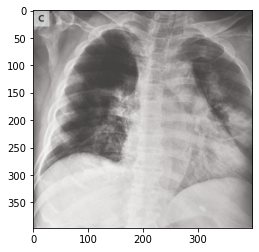

In [24]:
plt.imshow(output)
plt.show()

In [25]:
image = cv2.resize(image, (224, 224))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

# load the trained convolutional neural network and the multi-label
# binarizer
print("[INFO] loading network...")
model = load_model(args["model"])
mlb = pickle.loads(open(args["labelbin"], "rb").read())
# classify the input image then find the indexes of the two class
# labels with the *largest* probability
print("[INFO] classifying image...")
proba = model.predict(image)[0]
idxs = np.argsort(proba)[::-1][:2]

[INFO] loading network...


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MultiLabelBinarizer from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


[INFO] classifying image...


In [26]:
# loop over the indexes of the high confidence class labels
for (i, j) in enumerate(idxs):
    # build the label and draw the label on the image
    label = "{}: {:.2f}%".format(mlb.classes_[j], proba[j] * 100)
    cv2.putText(output, label, (10, (i * 30) + 25), 
        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    
# show the probabilities for each of the individual labels
for (label, p) in zip(mlb.classes_, proba):
    print("{}: {:.2f}%".format(label, p * 100))
    

covid: 99.97%
normal: 0.03%


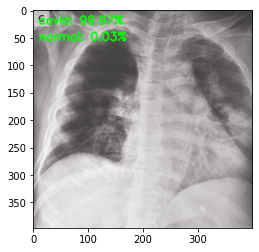

In [30]:
# show the output image
plt.imshow(output)
cv2.waitKey(0)
cv2.destroyAllWindows()